In [1]:
import torch

# California Housing Prices

In [2]:
import pandas as pd

all_data = pd.read_csv('housing_cali.csv')

In [3]:
all_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
all_data.shape

(20640, 10)

# Prepare data

In [5]:
#проверка пустых значений
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head(20)

,Missing Ratio
total_bedrooms,1.002907


In [6]:
#1% -> можем просто удалить кейсы с пустыми данными
all_data.dropna(inplace= True)
all_data.shape

(20433, 10)

In [7]:
#конвертация ocean_proximity из категориального признака в числовой
all_data = pd.get_dummies(all_data, columns=['ocean_proximity'], dtype = float)
all_data[all_data == 0] = -1
all_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,-1.0,-1.0,-1.0,1.0,-1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,-1.0,-1.0,-1.0,1.0,-1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,-1.0,-1.0,-1.0,1.0,-1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,-1.0,-1.0,-1.0,1.0,-1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,-1.0,1.0,-1.0,-1.0,-1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,-1.0,1.0,-1.0,-1.0,-1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,-1.0,1.0,-1.0,-1.0,-1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,-1.0,1.0,-1.0,-1.0,-1.0


In [8]:
#финальная проверка
all_data.isna().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms                0
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity_<1H OCEAN     0
ocean_proximity_INLAND        0
ocean_proximity_ISLAND        0
ocean_proximity_NEAR BAY      0
ocean_proximity_NEAR OCEAN    0
dtype: int64

# Split data to test and train

In [9]:
from sklearn.model_selection import cross_val_score, train_test_split
X = all_data.drop('median_house_value', axis=1)
y = all_data['median_house_value']


X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.2, random_state=98987)

In [10]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,-1.0,-1.0,-1.0,1.0,-1.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,-1.0,-1.0,-1.0,1.0,-1.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,-1.0,-1.0,-1.0,1.0,-1.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,-1.0,-1.0,-1.0,1.0,-1.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,-1.0,-1.0,-1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,-1.0,1.0,-1.0,-1.0,-1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,-1.0,1.0,-1.0,-1.0,-1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,-1.0,1.0,-1.0,-1.0,-1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,-1.0,1.0,-1.0,-1.0,-1.0


Первончально прочитав задание, фразу "Создайте класс модели" я воспринял буквально, и попытался создать этот класс вручную и проделать примерно то же самое, что было на уроке. 
Изучив вопросы к заданию от студентов, я понял свою ошибку (надо было пользоваться классом из pytorch), однако удалять мои эксперименты жалко. 

Изначально я создавал рандомные изначальные веса, и наблюдал как с learning rate > 1e-10 функция потерь улетает в бесконечность. 
Я попробовал уменьшить learning rate , после чего loss начал постепенно уменьшаться с каждой эпохой. (правда порядок loss был 10^12)
Затем я попробовал подобрать более удачные изначальные веса/

Порядок loss уменьшился, однаком обучение все равно происходит очень медленно. 

Правильно я понял, что подбор изначальных весов похоже играет существенную роль в обучении?

# Create Model class

In [11]:
import random
class LinRegModel:
    def __init__(self, batch_size, lr):
        self.batch_size = batch_size
        self.lr = lr
        self.w = torch.Tensor([-2, 8, 20000, 6, 500, 150, 487, 5.18, 10, -10, 100, 100, 100]).double()
        self.b = torch.Tensor([-70]).double()
        self.w.requires_grad_()
        self.b.requires_grad_()
    def linReg(self, X):
        return torch.mv(X, self.w) + self.b
    def squared_loss(self, y, y_test):
        return ((y-y_test) ** 2).mean()
    def sgd(self):
        self.w.data[:] = self.w - self.lr * self.w.grad
        self.b.data[:] = self.b - self.lr * self.b.grad
    def data_iter(self, X, y):
        num_examples = len(X)
        indices = list(range(num_examples))
        random.shuffle(indices)
        for i in range(0, num_examples, self.batch_size):
            j = indices[i: min(i + self.batch_size, num_examples)]
            yield X[j, :], y[j]
    def train(self, X_train, y_train, epoch_num):
        for epoch in range(epoch_num):
            for X, y in self.data_iter(X_train, y_train):
                self.w = self.w.detach()
                self.b = self.b.detach()
                self.w.requires_grad_()
                self.b.requires_grad_()
                l = self.squared_loss(self.linReg(X), y)
                #print(l)
                l.backward()
                self.sgd()
            train_l = self.squared_loss(self.linReg(X_train), y_train)
            print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

In [12]:
model = LinRegModel(500, 1e-10)
X_tensor = torch.from_numpy(X_train)
y_tensor = torch.Tensor(y_train.values)

In [ ]:
model.train(X_tensor, y_tensor, 1000)

# Linear regression on Torch


In [16]:
from torch.utils.data import TensorDataset, DataLoader

batch_size = 500
X_tensor = X_tensor.to(torch.float32)
y_tensor = y_tensor.to(torch.float32)
dataset = TensorDataset(X_tensor, y_tensor)
data_iter = DataLoader(dataset, batch_size, shuffle=True)
model = torch.nn.Sequential(torch.nn.Linear(13, 1))


In [17]:
init_w = torch.randn(13)
init_w *= 100
print("Initial weights: ", init_w)
init_b = torch.Tensor([10]).to(torch.float32)
print("Initial bias: ", init_b)

Initial weights:  tensor([  36.5840, -138.8175,  209.5289,   69.4387,  -92.7820,   56.2998,
         -70.0984,  -53.3859,   -2.9609,   48.6692,  -79.3555,  101.8220,
          76.4942])
Initial bias:  tensor([10.])


In [29]:
#loss = torch.nn.MSELoss(reduction='mean')
model[0].weight.data = init_w.clone().detach().requires_grad_(True).reshape((1, 13))
model[0].bias.data = init_b.clone().detach().requires_grad_(True).reshape((1))
#использовался L1Loss так как с ним обучение происходило быстрее, MSELoss улетал в nan при lr > 1e-8
loss = torch.nn.L1Loss()
#lr = 1e-2 выбран для скорости, при 1e-3 график loss плавно убывает, однако время обучения сильно увеличивается
trainer = torch.optim.SGD(model.parameters(), lr= 1e-2)
loss_values = []
#несколько раз дополнительно запускалось обучение, сначала loss был около 120к
num_epochs = 50000
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        trainer.zero_grad()
        l = loss(model(X).view(-1), y)
        l.backward()
        trainer.step()
    l = loss(model(X_tensor).view(-1), y_tensor)
    loss_values.append(l.detach())
    if epoch % 1000 == 0:
        print('epoch %d, loss: %f' % (epoch, l.item()),'|\tw', model[0].weight.data, '|\tb', model[0].bias.data)


epoch 1000, loss: 65566.710938 |	w tensor([[-2284.7356, -5401.2178,  1261.5267,    32.1572,  -169.9946,   -57.7560,
           237.3253, 13990.9375,  5124.3716, -7286.1255,   -85.0840,   950.3137,
          1396.0311]]) |	b tensor([24.7652])
epoch 2000, loss: 64603.058594 |	w tensor([[-2299.9900, -5467.4258,  1253.9144,    30.0361,  -167.4004,   -58.0228,
           236.5704, 14215.7549,  5195.2319, -7398.8428,   -84.6787,   969.7683,
          1419.0771]]) |	b tensor([24.5215])
epoch 3000, loss: 64649.601562 |	w tensor([[-2314.1450, -5532.6958,  1245.3861,    30.1732,  -165.8566,   -56.8917,
           234.7092, 14439.5078,  5265.4131, -7510.9497,   -84.2548,   989.3337,
          1442.0701]]) |	b tensor([24.2591])
epoch 4000, loss: 63549.546875 |	w tensor([[-2328.8435, -5596.4497,  1236.8735,    27.3454,  -164.6797,   -58.7766,
           233.9926, 14662.2207,  5334.8281, -7622.2461,   -83.8246,  1009.0112,
          1465.0065]]) |	b tensor([23.9910])
epoch 5000, loss: 63349.066406 |

epoch 35000, loss: 58018.230469 |	w tensor([[-2.6186e+03, -7.0019e+03,  1.0223e+03,  1.9499e+01, -1.1094e+02,
         -5.6084e+01,  2.0385e+02,  2.0981e+04,  7.1120e+03, -1.0715e+04,
         -6.4614e+01,  1.6724e+03,  2.1584e+03]]) |	b tensor([9.7841])
epoch 36000, loss: 57941.628906 |	w tensor([[-2.6238e+03, -7.0290e+03,  1.0159e+03,  2.0075e+01, -1.0982e+02,
         -5.5934e+01,  2.0264e+02,  2.1165e+04,  7.1571e+03, -1.0803e+04,
         -6.3818e+01,  1.6951e+03,  2.1802e+03]]) |	b tensor([9.1500])
epoch 37000, loss: 57845.054688 |	w tensor([[-2.6275e+03, -7.0553e+03,  1.0097e+03,  2.0125e+01, -1.0827e+02,
         -5.5762e+01,  2.0158e+02,  2.1348e+04,  7.2015e+03, -1.0890e+04,
         -6.3004e+01,  1.7178e+03,  2.2020e+03]]) |	b tensor([8.4965])
epoch 38000, loss: 57625.386719 |	w tensor([[-2.6325e+03, -7.0800e+03,  1.0034e+03,  1.9360e+01, -1.0566e+02,
         -5.6539e+01,  2.0119e+02,  2.1528e+04,  7.2450e+03, -1.0976e+04,
         -6.2191e+01,  1.7406e+03,  2.2237e+03]]) |

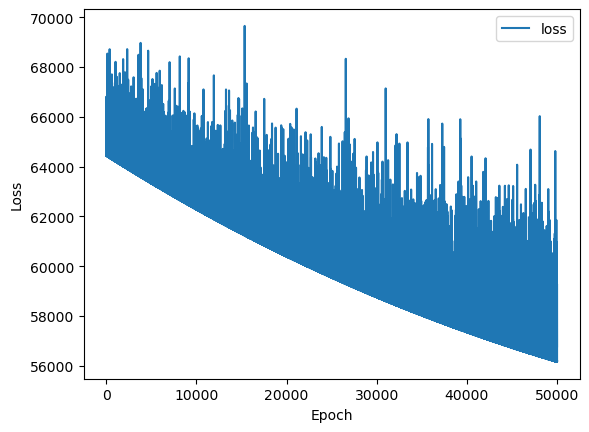

In [30]:
import matplotlib.pyplot as plt
plt.plot(range(len(loss_values)), loss_values, label='loss')
plt.xlabel('Epocha')
plt.ylabel('Loss')
plt.legend()

# Metrics

In [31]:

preds = model(torch.from_numpy(X_test).to(torch.float32))
trainpreds = model(torch.from_numpy(X_train).to(torch.float32))


In [32]:

from sklearn.metrics import mean_absolute_error, mean_squared_error
print("mae error on train: ", mean_absolute_error(y_train, trainpreds.detach().numpy())) # train
print("mae error on test: ", mean_absolute_error(y_test, preds.detach().numpy())) # test


mae error on train:  56177.458403865174
mae error on test:  56459.48674430502


In [33]:
from sklearn.metrics import r2_score
print("r2 error on train: ", r2_score(y_train, trainpreds.detach().numpy())) # train
print("r2 error on test: ", r2_score(y_test, preds.detach().numpy())) # test

r2 error on train:  0.5277289809339243
r2 error on test:  0.5175141209541589


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print("mse error on train: ", mean_squared_error(y_train, trainpreds.detach().numpy())) # train
print("mse error on test: ", mean_squared_error(y_test, preds.detach().numpy())) # test

mse error on train:  6264150142.608477
mse error on test:  6545942262.829815
